In [1]:
from lxml import etree

In [2]:
import os

base_dir = './datas/Segmentations.v5-instance-segmentation.voc/train'
xml_path = os.listdir(base_dir)[1::2]
xml_path[0]
with open(os.path.join(base_dir, xml_path[0])) as f:
    tree = etree.parse(f)
    root = tree.getroot()
    cont = root.getchildren()
        
print(tree)
print(root)
print(cont)

<Element annotation at 0x17129ddcbc0>
[<Element folder at 0x17129ddf440>, <Element filename at 0x17129ddf200>, <Element path at 0x17129ddd040>, <Element source at 0x17129ddfc80>, <Element size at 0x17129ddc1c0>, <Element segmented at 0x17129dde100>, <Element object at 0x17129dddc00>, <Element object at 0x17129dde000>]


In [3]:
root.tag

'annotation'

In [4]:
for d in cont:
    print(d.tag)

folder
filename
path
source
size
segmented
object
object


In [15]:
# 모든 tag 조회
for i in root.iter():
    print(i.tag)

annotation
folder
filename
path
source
database
size
width
height
depth
segmented
object
name
pose
truncated
difficult
occluded
bndbox
xmin
xmax
ymin
ymax
polygon
x1
y1
x2
y2
x3
y3
x4
y4
x5
y5
x6
y6
x7
y7
x8
y8
x9
y9
x10
y10
x11
y11
x12
y12
x13
y13
x14
y14
x15
y15
x16
y16
x17
y17
x18
y18
x19
y19
x20
y20
object
name
pose
truncated
difficult
occluded
bndbox
xmin
xmax
ymin
ymax
polygon
x1
y1
x2
y2
x3
y3
x4
y4
x5
y5
x6
y6
x7
y7
x8
y8
x9
y9
x10
y10
x11
y11
x12
y12
x13
y13
x14
y14
x15
y15
x16
y16


In [16]:
print(len(root))

8


In [36]:
for d in cont:
    if d.tag == "object":
        t_cont = d.getchildren()
        # print(t_cont)
        print("name:", t_cont[0].text)

name: Knife
name: Knife


In [87]:
box_dic = {}
for child in root.iter('object'):
    # print('-',child.tag)
    # print('object')
    # print("---------------------------------")
    for child_2 in child:
        # print(child_2.tag)
        if child_2.tag == 'bndbox':
            for child_3 in child_2:
                # print(child_3.tag, end=',')
                # print(child_3.tag, child_3.text)
                box_dic[child_3.tag] = int(child_3.text)

                
        if child_2.tag == 'polygon':
            polygon_x = []
            polygon_y = []
            for i, child_3 in enumerate(child_2):
                # print(child_3.tag, child_3.text)
                # coords = child_3.tag
                # coords_num = child_3.text
                # print(coords_num,end=',')
                
                if i%2 == 0:
                    polygon_x.append(float(child_3.text))
                else:
                    polygon_y.append(float(child_3.text))

                pairs = list(zip(polygon_x, polygon_y))
                

print(box_dic)
box = [box_dic['xmin'], box_dic['ymin'], box_dic['xmax'], box_dic['ymax']]
print(box)
# print(polygon_x)
# print(polygon_y)
print(pairs)

{'xmin': 209, 'xmax': 462, 'ymin': 251, 'ymax': 558}
[209, 251, 462, 558]
[(272.20065, 521.835442), (325.089377, 447.086041), (371.631457, 394.197314), (461.189702, 297.587239), (389.966216, 249.634793), (258.802172, 393.492131), (305.344252, 424.520184), (298.997605, 434.392746), (291.240591, 449.20159), (244.698511, 487.281474), (230.594851, 509.142148), (220.722288, 522.540625), (208.028994, 530.297639), (215.080824, 557.094594), (229.889668, 551.453129), (272.20065, 521.835442)]


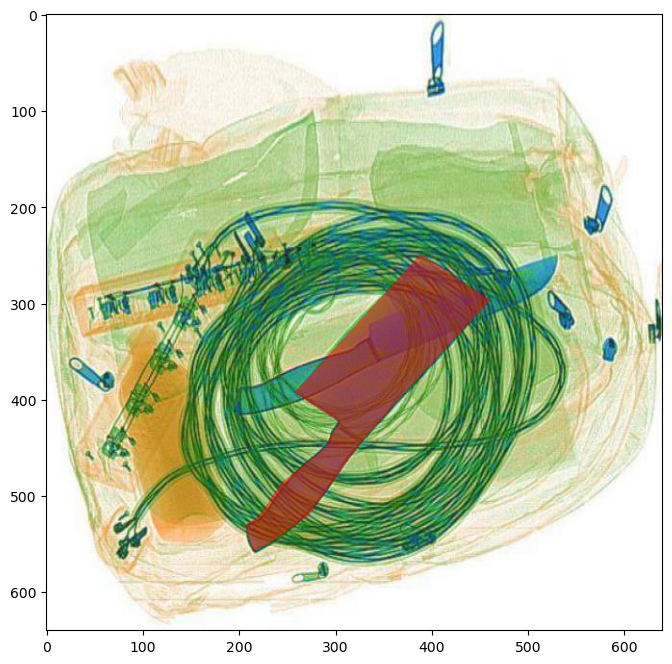

In [90]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import cv2

base_dir = './datas/Segmentations.v5-instance-segmentation.voc/train'
jpg_path = os.listdir(base_dir)[::2]
jpg_path[0]

image = Image.open(os.path.join(base_dir,jpg_path[0]))
poly_image = Image.new('RGBA', image.size, (0,0,0,0))
draw = ImageDraw.Draw(poly_image)
polygon_coords = pairs
draw.polygon(polygon_coords, fill = (255,0,0,128))

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.imshow(poly_image)
plt.show()